In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
%matplotlib inline

### Setting up the Dataset for analysis:

This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The dataset contains a total of 17 attributes and 2111 records,which represent the following:

**Gender:** The person's gender.

**Age:** The person's age.

**Height:** The person's height.

**Weight:** The person's weight.

**Family** History With Overweight: yes/no if their family has a history with obisity.

**FAVC:** Frequent consumption of high caloric foods.

**FCVC:** Frequency of consumption of vegetables.

**NCP:** Number of main meals.

**CAEC:** Consumption of food between meals.

**SMOKE:** Whether they smoke or not.

**CH2O:** Consumption of water daily.

**SCC:** Calories consumption monitoring.

**FAF:** Physical activity frequency.

**TUE:** Time using technology devices (hours).

**MTRANS:** Transportation method used.

**NObeyesdad:** Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

In [2]:
# Loading in the data sets:
ObesityData = pd.read_csv("ObesityDataSet.csv")

In [3]:
ObesityData.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


For our purposes, we wish to run exploratory multivariate linear regression to see which of a certain select attributes contribute most to weight gain/loss. The attributes we will be using for our analysis are the Gender, Age, TUE, and FAF and we'll see if data from them has any correlation or effect on the person's weight.  

In [4]:
# We extract the required columns:

# Encoding Female/Male as binary data.
ObesityData['Gender'] = ObesityData['Gender'].replace('Female', 0)
ObesityData['Gender'] = ObesityData['Gender'].replace('Male', 1)
gender = ObesityData['Gender']

age = ObesityData['Age']
height = ObesityData['Height']
techtime = ObesityData['TUE']
activetime = ObesityData['FAF']
weight = ObesityData['Weight']

In [5]:
ObesityData.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Linear Regression With Cross Validation:

Having extracted these variables from our dataframe, we can now begin performing multivariate linear regression. To do this, we will be performing linear regression with cross validation using two different model types: Model 1 (M1) and Model 2 (M2). For Model 1, we will analyse the relation each variable had with weight, and see if any relevant results emerge. For Model 2, which utilize two or more variables to see if their joint presence has any different impact on weight. We will then draw conclusions per model type seing which combination of variables has a more drastic impact on weight.

To achieve this analysis, we will split our data into training and testing partitions. Once done, we will solve our weights and get our prediction models which we will use to plot a linear regression scatterplot to see how profound of an impact they have on the weight. we will then calculate their SSE and RMSE to see which 1st degree model has a significant effect on a persons weight.

As for multivariate models comparing many atributes at once, we will create multiple models comparing multiple variables to see which one has the most effect on weight.

### Obisity Analysis:

#### Model 1's (M1):

<font color='grey'>$weight = w0 + w1(gender)$</font>

<font color='grey'>$weight = w0 + w1(age)$</font>

<font color='grey'>$weight = w0 + w1(height)$</font>

<font color='grey'>$weight = w0 + w1(techtime)$</font>

<font color='grey'>$weight = w0 + w1(activetime)$</font>

#### Model 2's (M2): 

<font color='grey'>$weight = w0 + w1(age) + w2(gender)$</font>

<font color='grey'>$weight = w0 + w1(age) + w2(height)$</font>

<font color='grey'>$weight = w0 + w1(age) + w2(techtime)$</font>

<font color='grey'>$weight = w0 + w1(age) + w2(activetime)$</font>

<font color='grey'>$weight = w0 + w1(gender) + w2(height)$</font>

<font color='grey'>$weight = w0 + w1(gender) + w2(techtime)$</font>

<font color='grey'>$weight = w0 + w1(gender) + w2(activetime)$</font>

<font color='grey'>$weight = w0 + w1(height) + w2(techtime)$</font>

<font color='grey'>$weight = w0 + w1(height) + w2(activitytime)$</font>

<font color='grey'>$quality = w0 + w1(techtime) + w2(activitytime)$</font>

In [6]:
# For model M1 (gender).

# Assigning variables to columns. 
X1 = gender
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain1, Xtest1, Ytrain1, Ytest1 = model_selection.train_test_split(X1, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain1 = Xtrain1.reset_index(drop = True)
Ytrain1 = Ytrain1.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A1. 
frames1 = [ones,Xtrain1]
A1 = pd.concat(frames1, axis = 1, sort = True)

# Solving for w, the weight vector.
w1 = np.linalg.lstsq(A1, Ytrain1)[0]
print('The weight vector for M1 (gender) is:', w1)
print('Model 1 (gender) is: weight =', w1[0], '+', w1[1], '*(gender)')

The weight vector for M1 (gender) is: [82.66514037  7.92778675]
Model 1 (gender) is: weight = 82.6651403697916 + 7.927786750453733 *(gender)


In [7]:
# For model M1 (age).

# Assigning variables to columns. 
X2 = age
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain2, Xtest2, Ytrain2, Ytest2 = model_selection.train_test_split(X2, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain2 = Xtrain2.reset_index(drop = True)
Ytrain2 = Ytrain2.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A2. 
frames2 = [ones,Xtrain2]
A2 = pd.concat(frames2, axis = 1, sort = True)

# Solving for w, the weight vector.
w2 = np.linalg.lstsq(A2, Ytrain2)[0]
print('The weight vector for M1 (age) is:', w2)
print('Model 1 (age) is: weight =', w2[0], '+', w2[1], '*(age)')

The weight vector for M1 (age) is: [67.23837738  0.80729773]
Model 1 (age) is: weight = 67.23837737719283 + 0.8072977313486424 *(age)


In [8]:
# For model M1 (height).

# Assigning variables to columns. 
X3 = height
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain3, Xtest3, Ytrain3, Ytest3 = model_selection.train_test_split(X3, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain3 = Xtrain3.reset_index(drop = True)
Ytrain3 = Ytrain3.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A3. 
frames = [ones,Xtrain3]
A3 = pd.concat(frames, axis = 1, sort = True)

# Solving for w, the weight vector.
w3 = np.linalg.lstsq(A3, Ytrain3)[0]
print('The weight vector for M1 (height) is:', w3)
print('Model 1 (height) is: weight =', w3[0], '+', w3[1], '*(height)')

The weight vector for M1 (height) is: [-132.78656847  129.08171659]
Model 1 (height) is: weight = -132.78656847253606 + 129.08171659337526 *(height)


In [9]:
# For model M1 (techtime).

# Assigning variables to columns. 
X4 = techtime
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain4, Xtest4, Ytrain4, Ytest4 = model_selection.train_test_split(X4, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain4 = Xtrain4.reset_index(drop = True)
Ytrain4 = Ytrain4.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A4. 
frames4 = [ones,Xtrain4]
A4 = pd.concat(frames4, axis = 1, sort = True)

# Solving for w, the weight vector.
w4 = np.linalg.lstsq(A4, Ytrain4)[0]
print('The weight vector for M4 (techtime) is:', w4)
print('Model 1 (techtime) is: weight =', w4[0], '+', w4[1], '*(techtime)')

The weight vector for M4 (techtime) is: [88.44916321 -2.99679454]
Model 1 (techtime) is: weight = 88.44916320631766 + -2.9967945370800404 *(techtime)


In [10]:
# For model M1 (activetime).

# Assigning variables to columns. 
X5 = activetime
Y = weight

# Splitting x and y for training(75%) and testing(25%).
Xtrain5, Xtest5, Ytrain5, Ytest5 = model_selection.train_test_split(X5, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they can concat properly.
Xtrain5 = Xtrain5.reset_index(drop = True)
Ytrain5 = Ytrain5.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A5. 
frames5 = [ones,Xtrain5]
A5 = pd.concat(frames5, axis = 1, sort = True)

# Solving for w, the weight vector.
w5 = np.linalg.lstsq(A5, Ytrain5)[0]
print('The weight vector for M4 (activetime) is:', w5)
print('Model 1 (activetime) is: weight =', w5[0], '+', w5[1], '*(activetime)')

The weight vector for M4 (activetime) is: [88.59911682 -2.05090738]
Model 1 (activetime) is: weight = 88.59911681762648 + -2.050907375596377 *(activetime)


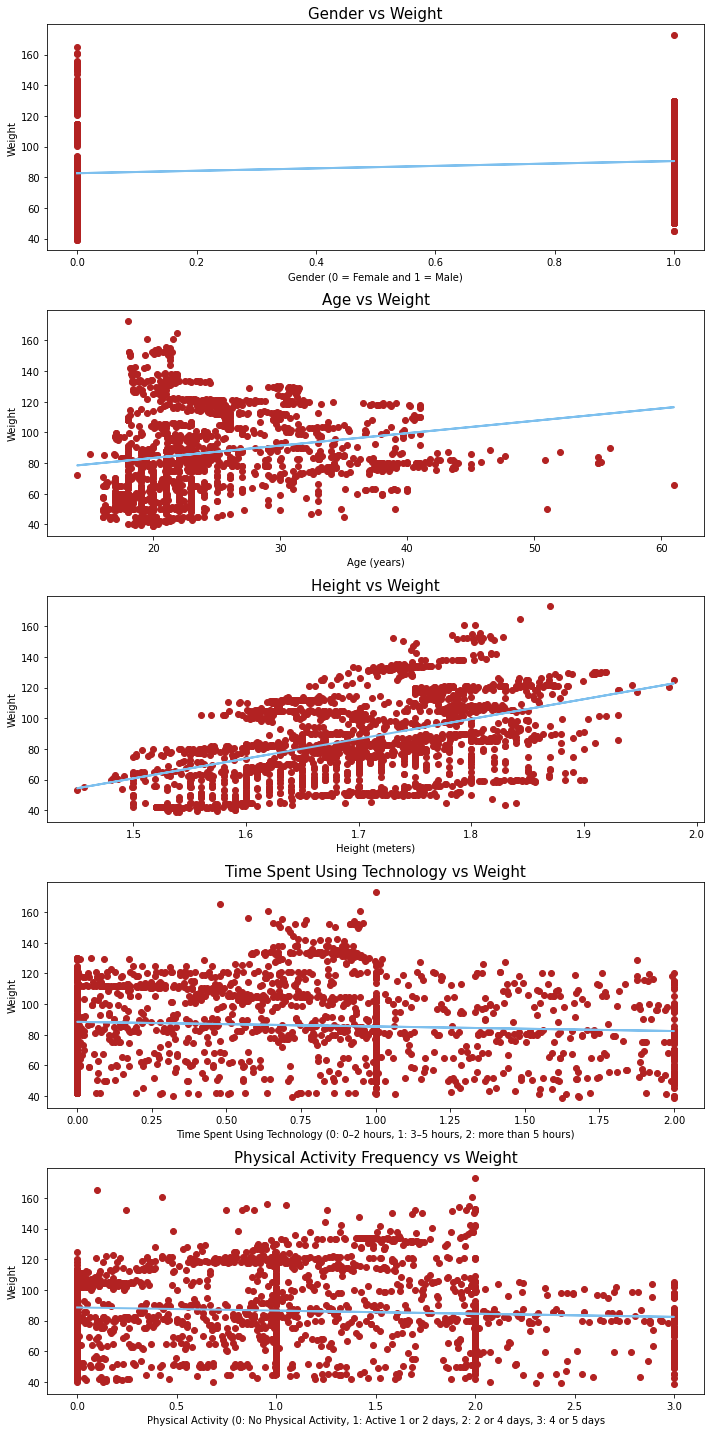

In [11]:
# Creating graphs for the M1 models.

# Coding the models as variables.
y1 = w1[0] + w1[1]*X1
y2 = w2[0] + w2[1]*X2
y3 = w3[0] + w3[1]*X3
y4 = w4[0] + w4[1]*X4
y5 = w5[0] + w5[1]*X5

# Creating code for subplots:
fig, axs = plt.subplots(5, figsize = (10,20))
axs[0].set_title('Gender vs Weight', {'fontsize': 15})
axs[1].set_title('Age vs Weight', {'fontsize': 15})
axs[2].set_title('Height vs Weight', {'fontsize': 15})
axs[3].set_title('Time Spent Using Technology vs Weight', {'fontsize': 15})
axs[4].set_title('Physical Activity Frequency vs Weight', {'fontsize': 15})

axs[0].scatter(X1, Y, color = '#B22222')
axs[1].scatter(X2, Y, color = '#B22222')
axs[2].scatter(X3, Y, color = '#B22222')
axs[3].scatter(X4, Y, color = '#B22222')
axs[4].scatter(X5, Y, color = '#B22222')

axs[0].set_xlabel("Gender (0 = Female and 1 = Male)")
axs[1].set_xlabel("Age (years)")
axs[2].set_xlabel("Height (meters)")
axs[3].set_xlabel("Time Spent Using Technology (0: 0–2 hours, 1: 3–5 hours, 2: more than 5 hours)")
axs[4].set_xlabel("Physical Activity (0: No Physical Activity, 1: Active 1 or 2 days, 2: 2 or 4 days, 3: 4 or 5 days")

axs[0].set_ylabel("Weight")
axs[1].set_ylabel("Weight")
axs[2].set_ylabel("Weight")
axs[3].set_ylabel("Weight")
axs[4].set_ylabel("Weight")

axs[0].plot(X1, y1, c = '#7EC0EE', linewidth = 2.0)
axs[1].plot(X2, y2, c = '#7EC0EE', linewidth = 2.0)
axs[2].plot(X3, y3, c = '#7EC0EE', linewidth = 2.0)
axs[3].plot(X4, y4, c = '#7EC0EE', linewidth = 2.0)
axs[4].plot(X5, y5, c = '#7EC0EE', linewidth = 2.0)


fig.tight_layout()

Here are some results we can gather by taking a quick glance at our regression graphs:

**Gender:** We see very little discrepency in weight difference between being a Male or Female. Males do score every so slighty heavier than Females, but overall there's nothing noteworthy here to report.

**Age:** We saw a strong correlation in weight gain the older people from both genders got. This is unsurprising because older folk might be less active and have slower metabolisms than younger people.

**Height:** Another unsurpring positive correlation is height and weight. It makes sense that taller people weigh more. However what we can *not* define is whether that weight is muscle mass or fat, as the dataset does not provide a BMI or muscle mass/fat percentage data. However we *can* reliably say taller people weigh more.

**Time Spent with Technology:** At a quick glance, this one was a little surprising, as we thought more time spent playing video games/watching TV would yield a more unhealthy lifestyle, but it does not seem to be the case. (At least not with this model). In fact we see a slight *decrease* in weight the *MORE* they enteract with technology. This is definately surprising to say the least, however it's important to note that just because this univariate model found no correlation between it's variable and weight, it doesn't mean one doesn't exist. This is where our multivariate, M2, models come into play later. 

**Physical Activity Frequency:** Another surprising regression result. We do see a slight decrease in weight the more they exercise but not anywhere close to what it should have been. Once again though, it's important to note that just because this univariate model found no correlation between it's variable and weight, it doesn't mean one doesn't exist. This is where our multivariate, M2, models come into play later. 



In [12]:
# For model M2 (age and gender).

X6 = ObesityData[["Age","Gender"]]
X6 = pd.DataFrame(X6)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain6, Xtest6, Ytrain6, Ytest6 = model_selection.train_test_split(X6, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain6 = Xtrain6.reset_index(drop = True)
Ytrain6 = Ytrain6.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A6. 
frames6 = [ones,Xtrain6]
A6 = pd.concat(frames6, axis = 1,sort = True)

# Solving for w, the weight vector.
w6 = np.linalg.lstsq(A6,Ytrain6)[0]
print('\n The weight vector is:\n', w6)
print('\n The Multivariate Model for Age and Gender is:\n Weight =', 
      w6[0], '+', w6[1], '*(age) +', w6[2], '*(gender)')


 The weight vector is:
 [[62.71828003]
 [ 0.82890296]
 [ 7.08147685]]

 The Multivariate Model for Age and Gender is:
 Weight = [62.71828003] + [0.82890296] *(age) + [7.08147685] *(gender)


In [13]:
# For model M2 (age and height).

X7 = ObesityData[["Age","Height"]]
X7 = pd.DataFrame(X7)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain7, Xtest7, Ytrain7, Ytest7 = model_selection.train_test_split(X7, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain7 = Xtrain7.reset_index(drop = True)
Ytrain7 = Ytrain7.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A7. 
frames7 = [ones,Xtrain7]
A7 = pd.concat(frames7, axis = 1,sort = True)

# Solving for w, the weight vector.
w7 = np.linalg.lstsq(A7,Ytrain7)[0]
print('\n The weight vector is:\n',  w7)
print('\n The Multivariate Model for Age and Height is:\n Weight =', 
      w7[0], '+', w7[1], '*(age) +', w7[2], '*(height)')


 The weight vector is:
 [[-160.05838733]
 [   0.84430489]
 [ 133.03207089]]

 The Multivariate Model for Age and Height is:
 Weight = [-160.05838733] + [0.84430489] *(age) + [133.03207089] *(height)


In [14]:
# For model M2 (age and techtime).

X8 = ObesityData[["Age","TUE"]]
X8 = pd.DataFrame(X8)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain8, Xtest8, Ytrain8, Ytest8 = model_selection.train_test_split(X8, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain8 = Xtrain8.reset_index(drop = True)
Ytrain8 = Ytrain8.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A8. 
frames8 = [ones,Xtrain8]
A8 = pd.concat(frames8, axis = 1,sort = True)

# Solving for w, the weight vector.
w8 = np.linalg.lstsq(A8,Ytrain8)[0]
print('\n The weight vector is:\n',  w8)
print('\n The Multivariate Model for Age and Techtime is:\n Weight =',
      w8[0], '+', w8[1], '*(age) +', w8[2], '*(techtime)')


 The weight vector is:
 [[66.04693566]
 [ 0.82902729]
 [ 0.59256285]]

 The Multivariate Model for Age and Techtime is:
 Weight = [66.04693566] + [0.82902729] *(age) + [0.59256285] *(techtime)


In [15]:
# For model M2 (age and activetime).

X9 = ObesityData[["Age","FAF"]]
X9 = pd.DataFrame(X9)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain9, Xtest9, Ytrain9, Ytest9 = model_selection.train_test_split(X9, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain9 = Xtrain9.reset_index(drop = True)
Ytrain9 = Ytrain9.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A9. 
frames9 = [ones,Xtrain9]
A9 = pd.concat(frames9, axis = 1, sort = True)

# Solving for w, the weight vector.
w9 = np.linalg.lstsq(A9, Ytrain9)[0]
print('\n The weight vector is:\n', w9)
print('\n The Multivariate Model for Age and Activetime is:\n Weight =', 
      w9[0], '+', w9[1], '*(age) +', w9[2], '*(activetime)')


 The weight vector is:
 [[66.92276748]
 [ 0.8507582 ]
 [-0.96405175]]

 The Multivariate Model for Age and Activetime is:
 Weight = [66.92276748] + [0.8507582] *(age) + [-0.96405175] *(activetime)


In [16]:
# For model M2 (gender and height).

X10 = ObesityData[["Gender","Height"]]
X10 = pd.DataFrame(X10)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain10, Xtest10, Ytrain10, Ytest10 = model_selection.train_test_split(X10, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain10 = Xtrain10.reset_index(drop = True)
Ytrain10 = Ytrain10.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A10. 
frames10 = [ones,Xtrain10]
A10 = pd.concat(frames10, axis = 1, sort = True)

# Solving for w, the weight vector.
w10 = np.linalg.lstsq(A10, Ytrain10)[0]
print('\n The weight vector is:\n', w10)
print('\n The Multivariate Model for Gender and Height is:\n Weight =', 
      w10[0], '+', w10[1], '*(gender) +', w10[2], '*(height)')


 The weight vector is:
 [[-187.92576837]
 [ -10.76059819]
 [ 164.48540491]]

 The Multivariate Model for Gender and Height is:
 Weight = [-187.92576837] + [-10.76059819] *(gender) + [164.48540491] *(height)


In [17]:
# For model M2 (gender and techtime).

X11 = ObesityData[["Gender","TUE"]]
X11 = pd.DataFrame(X11)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain11, Xtest11, Ytrain11, Ytest11 = model_selection.train_test_split(X11, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain11 = Xtrain11.reset_index(drop = True)
Ytrain11 = Ytrain11.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A11. 
frames11 = [ones,Xtrain11]
A11 = pd.concat(frames11, axis = 1, sort = True)

# Solving for w, the weight vector.
w11 = np.linalg.lstsq(A11, Ytrain11)[0]
print('\n The weight vector is:\n', w11)
print('\n The Multivariate Model for Gender and Techtime is:\n Weight =', w11[0], '+', 
      w11[1], '*(gender) +', w11[2], '*(techtime)')


 The weight vector is:
 [[83.90097768]
 [ 9.43373292]
 [-3.09302681]]

 The Multivariate Model for Gender and Techtime is:
 Weight = [83.90097768] + [9.43373292] *(gender) + [-3.09302681] *(techtime)


In [18]:
# For model M2 (gender and activetime).

X12 = ObesityData[["Gender","FAF"]]
X12 = pd.DataFrame(X12)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain12, Xtest12, Ytrain12, Ytest12 = model_selection.train_test_split(X12, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain12 = Xtrain12.reset_index(drop = True)
Ytrain12 = Ytrain12.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A12. 
frames12 = [ones,Xtrain12]
A12 = pd.concat(frames12, axis = 1, sort = True)

# Solving for w, the weight vector.
w12 = np.linalg.lstsq(A12, Ytrain12)[0]
print('\n The weight vector is:\n', w12)
print('\n The Multivariate Model for Gender and Activetimte is:\n Weight =',
      w12[0], '+', w12[1], '*(gender) +', w12[2], '*(activetime)')


 The weight vector is:
 [[84.93500451]
 [ 9.10740444]
 [-2.92835879]]

 The Multivariate Model for Gender and Activetimte is:
 Weight = [84.93500451] + [9.10740444] *(gender) + [-2.92835879] *(activetime)


In [19]:
# For model M2 (height and techtime).

X13 = ObesityData[["Height","TUE"]]
X13 = pd.DataFrame(X13)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain13, Xtest13, Ytrain13, Ytest13 = model_selection.train_test_split(X13, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain13 = Xtrain13.reset_index(drop = True)
Ytrain13 = Ytrain13.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A13. 
frames13 = [ones,Xtrain13]
A13 = pd.concat(frames13, axis = 1, sort = True)

# Solving for w, the weight vector.
w13 = np.linalg.lstsq(A13, Ytrain13)[0]
print('\n The weight vector is:\n', w13)
print('\n The Multivariate Model for Height and Techtime is:\n Weight =', 
      w13[0], '+', w13[1], '*(height) +', w13[2], '*(techtime)')


 The weight vector is:
 [[-143.98096511]
 [ 137.03081004]
 [  -3.76226117]]

 The Multivariate Model for Height and Techtime is:
 Weight = [-143.98096511] + [137.03081004] *(height) + [-3.76226117] *(techtime)


In [20]:
# For model M2 (height and activetime).

X14 = ObesityData[["Height","FAF"]]
X14 = pd.DataFrame(X14)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain14, Xtest14, Ytrain14, Ytest14 = model_selection.train_test_split(X14, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain14 = Xtrain14.reset_index(drop = True)
Ytrain14 = Ytrain14.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A14. 
frames14 = [ones,Xtrain14]
A14 = pd.concat(frames14, axis = 1, sort = True)

# Solving for w, the weight vector.
w14 = np.linalg.lstsq(A14, Ytrain14)[0]
print('\n The weight vector is:\n', w14)
print('\n The Multivariate Model for Height and Activetimte is:\n Weight =',
      w14[0], '+', w14[1], '*(height) +', w14[2], '*(activetime)')


 The weight vector is:
 [[-160.08753701]
 [ 148.16361637]
 [  -5.98193037]]

 The Multivariate Model for Height and Activetimte is:
 Weight = [-160.08753701] + [148.16361637] *(height) + [-5.98193037] *(activetime)


In [21]:
# For model M2 (techtime and activetime).

X15 = ObesityData[["TUE","FAF"]]
X15 = pd.DataFrame(X15)
Y = ObesityData["Weight"]
Y = pd.DataFrame(Y)

# Split x and y for training(75%) and testing (25%).
Xtrain15, Xtest15, Ytrain15, Ytest15 = model_selection.train_test_split(X15, Y, test_size = .25)

# Cleaning/redoing the index of the Xtrain and Ytrain datasets so they concat properly.
Xtrain15 = Xtrain15.reset_index(drop = True)
Ytrain15 = Ytrain15.reset_index(drop = True)

# Creating and transforming ones, from np array to DataFrame.
ones_array = np.ones(1583, dtype = int)
ones = pd.DataFrame(ones_array)

# Creating the augmented data array, A15. 
frames15 = [ones, Xtrain15]
A15 = pd.concat(frames15, axis = 1, sort = True)

# Solving for w, the weight vector.
w15 = np.linalg.lstsq(A15, Ytrain15)[0]
print('\n The weight vector is:\n', w15)
print('\n The Multivariate Model for Techtime and Activetimte is:\n Weight =',
      w15[0], '+', w15[1], '*(techtime) +', w15[2], '*(activetime)')


 The weight vector is:
 [[90.40305405]
 [-3.22627353]
 [-1.56131665]]

 The Multivariate Model for Techtime and Activetimte is:
 Weight = [90.40305405] + [-3.22627353] *(techtime) + [-1.56131665] *(activetime)


### Calculating SSEs and RMSEs:

In [22]:
# Defining all Y's and Y-bars for the upcoming RMSE calculations
# Converting them to np arrays. 

# For Model 1 (gender):
y_train1 = Ytrain1
M1_train_gender_y_bar = w1[0] + w1[1]*(Xtrain1)
M1_train_gender_y_bar = np.array(M1_train_gender_y_bar)
y_train1 = np.array(y_train1)

y_test1 = Ytest1
M1_test_gender_y_bar = w1[0] + w1[1]*(Xtest1)
M1_test_gender_y_bar = np.array(M1_test_gender_y_bar)
y_test1 = np.array(y_test1)

# For Model 1 (age):
y_train2 = Ytrain2
M1_train_age_y_bar = w2[0] + w2[1]*(Xtrain2)
M1_train_age_y_bar = np.array(M1_train_age_y_bar)
y_train2 = np.array(y_train2)

y_test2 = Ytest2
M1_test_age_y_bar = w2[0] + w2[1]*(Xtest2)
M1_test_age_y_bar = np.array(M1_test_age_y_bar)
y_test2 = np.array(y_test2)

# For Model 1 (height):
y_train3 = Ytrain3
M1_train_height_y_bar = w3[0] + w3[1]*(Xtrain3)
M1_train_height_y_bar = np.array(M1_train_height_y_bar)
y_train3 = np.array(y_train3)

y_test3 = Ytest3
M1_test_height_y_bar = w3[0] + w3[1]*(Xtest3)
M1_test_height_y_bar = np.array(M1_test_height_y_bar)
y_test3 = np.array(y_test3)

# For Model 1 (techtime):
y_train4 = Ytrain4
M1_train_techtime_y_bar = w4[0] + w4[1]*(Xtrain4)
M1_train_techtime_y_bar = np.array(M1_train_techtime_y_bar)
y_train4 = np.array(y_train4)

y_test4 = Ytest4
M1_test_techtime_y_bar = w4[0] + w4[1]*(Xtest4)
M1_test_techtime_y_bar = np.array(M1_test_techtime_y_bar)
y_test4 = np.array(y_test4)

# For Model 1 (activetime):
y_train5 = Ytrain5
M1_train_activetime_y_bar = w5[0] + w5[1]*(Xtrain5)
M1_train_activetime_y_bar = np.array(M1_train_activetime_y_bar)
y_train5 = np.array(y_train5)

y_test5 = Ytest5
M1_test_activetime_y_bar = w5[0] + w5[1]*(Xtest5)
M1_test_activetime_y_bar = np.array(M1_test_activetime_y_bar)
y_test5 = np.array(y_test5)

# For Model 2 (age and gender):
y_train6 = Ytrain6
M2_train_ageandgender_y_bar = w6[0] + w6[1]*(Xtrain6['Age']) + w6[2]*(Xtrain6['Gender'])
M2_train_ageandgender_y_bar = np.array(M2_train_ageandgender_y_bar)
y_train6 = np.array(y_train6)

y_test6 = Ytest6
M2_test_ageandgender_y_bar = w6[0] + w6[1]*(Xtest6['Age']) + w6[2]*(Xtest6['Gender'])
M2_test_ageandgender_y_bar = np.array(M2_test_ageandgender_y_bar)
y_test6 = np.array(y_test6)

# For Model 2 (age and height):
y_train7 = Ytrain7
M2_train_ageandheight_y_bar = w7[0] + w7[1]*(Xtrain7['Age']) + w7[2]*(Xtrain7['Height'])
M2_train_ageandheight_y_bar = np.array(M2_train_ageandheight_y_bar)
y_train7 = np.array(y_train7)

y_test7 = Ytest7
M2_test_ageandheight_y_bar = w7[0] + w7[1]*(Xtest7['Age']) + w7[2]*(Xtest7['Height'])
M2_test_ageandheight_y_bar = np.array(M2_test_ageandheight_y_bar)
y_test7 = np.array(y_test7)

# For Model 2 (age and techtime):
y_train8 = Ytrain8
M2_train_ageandtechtime_y_bar = w8[0] + w8[1]*(Xtrain8['Age']) + w8[2]*(Xtrain8['TUE'])
M2_train_ageandtechtime_y_bar = np.array(M2_train_ageandtechtime_y_bar)
y_train8 = np.array(y_train8)

y_test8 = Ytest8
M2_test_ageandtechtime_y_bar = w8[0] + w8[1]*(Xtest8['Age']) + w8[2]*(Xtest8['TUE'])
M2_test_ageandtechtime_y_bar = np.array(M2_test_ageandtechtime_y_bar)
y_test8 = np.array(y_test8)

# For Model 2 (age and activetime):
y_train9 = Ytrain9
M2_train_ageandactivetime_y_bar = w9[0] + w9[1]*(Xtrain9['Age']) + w9[2]*(Xtrain9['FAF'])
M2_train_ageandactivetime_y_bar = np.array(M2_train_ageandactivetime_y_bar)
y_train9 = np.array(y_train9)

y_test9 = Ytest9
M2_test_ageandactivetime_y_bar = w9[0] + w9[1]*(Xtest9['Age']) + w9[2]*(Xtest9['FAF'])
M2_test_ageandactivetime_y_bar = np.array(M2_test_ageandactivetime_y_bar)
y_test9 = np.array(y_test9)

# For Model 2 (gender and height):
y_train10 = Ytrain10
M2_train_genderandheight_y_bar = w10[0] + w10[1]*(Xtrain10["Gender"]) + w10[2]*(Xtrain10["Height"])
M2_train_genderandheight_y_bar = np.array(M2_train_genderandheight_y_bar)
y_train10 = np.array(y_train10)

y_test10 = Ytest10
M2_test_genderandheight_y_bar = w10[0] + w10[1]*(Xtest10["Gender"]) + w10[2]*(Xtest10["Height"])
M2_test_genderandheight_y_bar = np.array(M2_test_genderandheight_y_bar)
y_test10 = np.array(y_test10)

# For Model 2 (gender and techtime):
y_train11 = Ytrain11
M2_train_genderandtechtime_y_bar = w11[0] + w11[1]*(Xtrain11["Gender"]) + w11[2]*(Xtrain11["TUE"])
M2_train_genderandtechtime_y_bar = np.array(M2_train_genderandtechtime_y_bar)
y_train11 = np.array(y_train11)

y_test11 = Ytest11
M2_test_genderandtechtime_y_bar = w11[0] + w11[1]*(Xtest11["Gender"]) + w11[2]*(Xtest11["TUE"])
M2_test_genderandtechtime_y_bar = np.array(M2_test_genderandtechtime_y_bar)
y_test11 = np.array(y_test11)

# For Model 2 (gender and activetime):
y_train12 = Ytrain12
M2_train_genderandactivetime_y_bar = w12[0] + w12[1]*(Xtrain12["Gender"]) + w12[2]*(Xtrain12["FAF"])
M2_train_genderandactivetime_y_bar = np.array(M2_train_genderandactivetime_y_bar)
y_train12 = np.array(y_train12)

y_test12 = Ytest12
M2_test_genderandactivetime_y_bar = w12[0] + w12[1]*(Xtest12["Gender"]) + w12[2]*(Xtest12["FAF"])
M2_test_genderandactivetime_y_bar = np.array(M2_test_genderandactivetime_y_bar)
y_test12 = np.array(y_test12)

# For Model 2 (height and techtime):
y_train13 = Ytrain13
M2_train_heightandtechtime_y_bar = w13[0] + w13[1]*(Xtrain13['Height']) + w13[2]*(Xtrain13['TUE'])
M2_train_heightandtechtime_y_bar = np.array(M2_train_heightandtechtime_y_bar)
y_train13 = np.array(y_train13)

y_test13 = Ytest13
M2_test_heightandtechtime_y_bar = w13[0] + w13[1]*(Xtest13['Height']) + w13[2]*(Xtest13['TUE'])
M2_test_heightandtechtime_y_bar = np.array(M2_test_heightandtechtime_y_bar)
y_test13 = np.array(y_test13)

# For Model 2 (height and activetime):
y_train14 = Ytrain14
M2_train_heightandactivetime_y_bar = w14[0] + w14[1]*(Xtrain14['Height']) + w14[2]*(Xtrain14['FAF'])
M2_train_heightandactivetime_y_bar = np.array(M2_train_heightandactivetime_y_bar)
y_train14 = np.array(y_train14)

y_test14 = Ytest14
M2_test_heightandactivetime_y_bar = w14[0] + w14[1]*(Xtest14['Height']) + w14[2]*(Xtest14['FAF'])
M2_test_heightandactivetime_y_bar = np.array(M2_test_heightandactivetime_y_bar)
y_test14 = np.array(y_test14)

# For Model 2 (techtime and activetime):
y_train15 = Ytrain15
M2_train_techtimeandactivetime_y_bar = w15[0] + w15[1]*(Xtrain15['TUE']) + w15[2]*(Xtrain15['FAF'])
M2_train_techtimeandactivetime_y_bar = np.array(M2_train_techtimeandactivetime_y_bar)
y_train15 = np.array(y_train15)

y_test15 = Ytest15
M2_test_techtimeandactivetime_y_bar = w15[0] + w15[1]*(Xtest15['TUE']) + w15[2]*(Xtest15['FAF'])
M2_test_techtimeandactivetime_y_bar = np.array(M2_test_techtimeandactivetime_y_bar)
y_test15 = np.array(y_test15)

In [23]:
# Taking the SSE of each Model with their training and test samples. 
SSE1_train = np.sum(np.square(M1_train_gender_y_bar - y_train1))
SSE1_test = np.sum(np.square(M1_test_gender_y_bar - y_test1))

SSE2_train = np.sum(np.square(M1_train_age_y_bar - y_train2))
SSE2_test = np.sum(np.square(M1_test_age_y_bar - y_test2))

SSE3_train = np.sum(np.square(M1_train_height_y_bar - y_train3))
SSE3_test = np.sum(np.square(M1_test_height_y_bar - y_test3))

SSE4_train = np.sum(np.square(M1_train_techtime_y_bar - y_train4))
SSE4_test = np.sum(np.square(M1_test_techtime_y_bar - y_test4))

SSE5_train = np.sum(np.square(M1_train_activetime_y_bar - y_train5))
SSE5_test = np.sum(np.square(M1_test_activetime_y_bar - y_test5))

SSE6_train = np.sum(np.square(M2_train_ageandgender_y_bar - y_train6))
SSE6_test = np.sum(np.square(M2_test_ageandgender_y_bar - y_test6))

SSE7_train = np.sum(np.square(M2_train_ageandheight_y_bar - y_train7))
SSE7_test = np.sum(np.square(M2_test_ageandheight_y_bar - y_test7))

SSE8_train = np.sum(np.square(M2_train_ageandtechtime_y_bar - y_train8))
SSE8_test = np.sum(np.square(M2_test_ageandtechtime_y_bar - y_test8))

SSE9_train = np.sum(np.square(M2_train_ageandactivetime_y_bar - y_train9))
SSE9_test = np.sum(np.square(M2_test_ageandactivetime_y_bar - y_test9))

SSE10_train = np.sum(np.square(M2_train_genderandheight_y_bar - y_train10))
SSE10_test = np.sum(np.square(M2_test_genderandheight_y_bar - y_test10))

SSE11_train = np.sum(np.square(M2_train_genderandtechtime_y_bar - y_train11))
SSE11_test = np.sum(np.square(M2_test_genderandtechtime_y_bar - y_test11))

SSE12_train = np.sum(np.square(M2_train_genderandactivetime_y_bar - y_train12))
SSE12_test = np.sum(np.square(M2_test_genderandactivetime_y_bar - y_test12))

SSE13_train = np.sum(np.square(M2_train_heightandtechtime_y_bar - y_train13))
SSE13_test = np.sum(np.square(M2_test_heightandtechtime_y_bar - y_test13))

SSE14_train = np.sum(np.square(M2_train_heightandactivetime_y_bar - y_train14))
SSE14_test = np.sum(np.square(M2_test_heightandactivetime_y_bar - y_test14))

SSE15_train = np.sum(np.square(M2_train_techtimeandactivetime_y_bar - y_train15))
SSE15_test = np.sum(np.square(M2_test_techtimeandactivetime_y_bar - y_test15))

# Taking the RMSE of each Model with their training then test samples. 
n = len(Y)

RMSE1_train = np.sqrt(np.sum(np.square(M1_train_gender_y_bar - y_train1)/n))
RMSE1_test = np.sqrt(np.sum(np.square(M1_test_gender_y_bar - y_test1)/n))

RMSE2_train = np.sqrt(np.sum(np.square(M1_train_age_y_bar - y_train2)/n))
RMSE2_test = np.sqrt(np.sum(np.square(M1_test_age_y_bar - y_test2)/n))

RMSE3_train = np.sqrt(np.sum(np.square(M1_train_height_y_bar - y_train3)/n))
RMSE3_test = np.sqrt(np.sum(np.square(M1_test_height_y_bar - y_test3)/n))

RMSE4_train = np.sqrt(np.sum(np.square(M1_train_techtime_y_bar - y_train4)/n))
RMSE4_test = np.sqrt(np.sum(np.square(M1_test_techtime_y_bar - y_test4)/n))

RMSE5_train = np.sqrt(np.sum(np.square(M1_train_activetime_y_bar - y_train5)/n))
RMSE5_test = np.sqrt(np.sum(np.square(M1_test_activetime_y_bar - y_test5)/n))

RMSE6_train = np.sqrt(np.sum(np.square(M2_train_ageandgender_y_bar - y_train6)/n))
RMSE6_test = np.sqrt(np.sum(np.square(M2_test_ageandgender_y_bar - y_test6)/n))

RMSE7_train = np.sqrt(np.sum(np.square(M2_train_ageandheight_y_bar - y_train7)/n))
RMSE7_test = np.sqrt(np.sum(np.square(M2_test_ageandheight_y_bar - y_test7)/n))

RMSE8_train = np.sqrt(np.sum(np.square(M2_train_ageandtechtime_y_bar - y_train8)/n))
RMSE8_test = np.sqrt(np.sum(np.square(M2_test_ageandtechtime_y_bar - y_test8)/n))

RMSE9_train = np.sqrt(np.sum(np.square(M2_train_ageandactivetime_y_bar - y_train9)/n))
RMSE9_test = np.sqrt(np.sum(np.square(M2_test_ageandactivetime_y_bar - y_test9)/n))

RMSE10_train = np.sqrt(np.sum(np.square(M2_train_genderandheight_y_bar - y_train10)/n))
RMSE10_test = np.sqrt(np.sum(np.square(M2_test_genderandheight_y_bar - y_test10)/n))

RMSE11_train = np.sqrt(np.sum(np.square(M2_train_genderandtechtime_y_bar - y_train11)/n))
RMSE11_test = np.sqrt(np.sum(np.square(M2_test_genderandtechtime_y_bar - y_test11)/n))

RMSE12_train = np.sqrt(np.sum(np.square(M2_train_genderandactivetime_y_bar - y_train12)/n))
RMSE12_test = np.sqrt(np.sum(np.square(M2_test_genderandactivetime_y_bar - y_test12)/n))

RMSE13_train = np.sqrt(np.sum(np.square(M2_train_heightandtechtime_y_bar - y_train13)/n))
RMSE13_test = np.sqrt(np.sum(np.square(M2_test_heightandtechtime_y_bar - y_test13)/n))

RMSE14_train = np.sqrt(np.sum(np.square(M2_train_heightandactivetime_y_bar - y_train14)/n))
RMSE14_test = np.sqrt(np.sum(np.square(M2_test_heightandactivetime_y_bar - y_test14)/n))

RMSE15_train = np.sqrt(np.sum(np.square(M2_train_techtimeandactivetime_y_bar - y_train15)/n))
RMSE15_test = np.sqrt(np.sum(np.square(M2_test_techtimeandactivetime_y_bar - y_test15)/n))

223451521.84045583


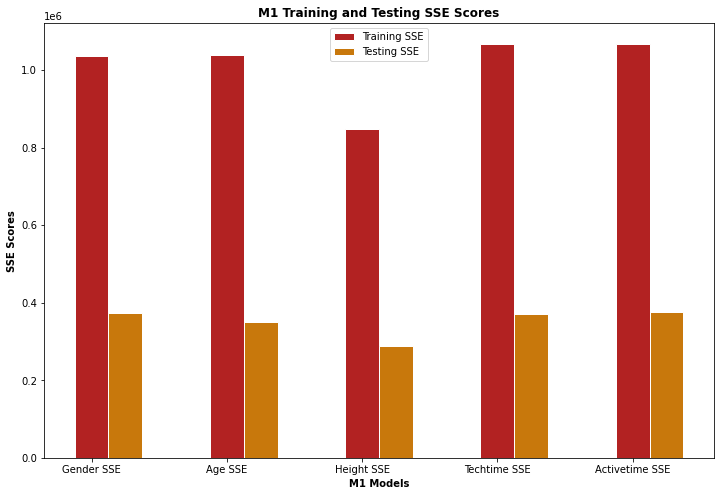

Training SSE for Model 1 (Gender) is: 1036743.9756043293
Test SSE for Model 1 (Gender) is: 373008.89886885846

Training SSE for Model 1 (Age) is: 1038325.4670375927
Test SSE for Model 1 (Age) is: 349934.1568870952

Training SSE for Model 1 (Height) is: 847490.748191978
Test SSE for Model 1 (Height) is: 289643.39019920153

Training SSE for Model 1 (Techtime) is: 1068419.2351634619
Test SSE for Model 1 (Techtime) is: 371610.9589809072

Training SSE for Model 1 (Activetime) is: 1067608.5526335782
Test SSE for Model 1 (Activetime) is: 376314.93544519844


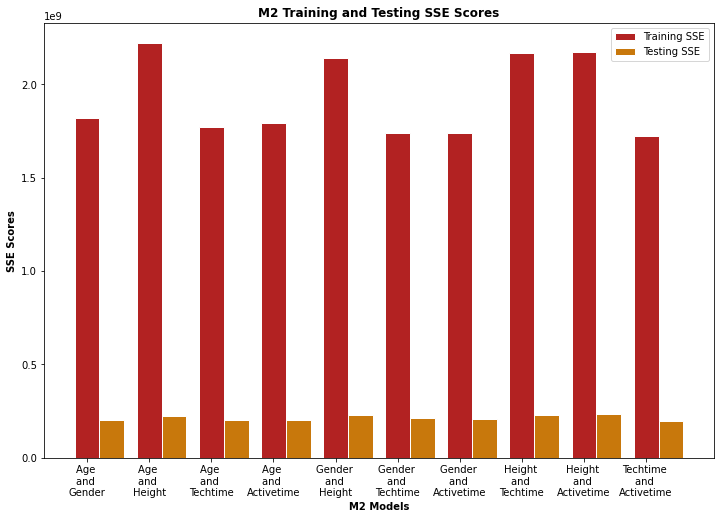

Training SSE for Model 2 (Age and Gender) is: 1819987996.2665207
Test SSE for Model 2 (Age and Gender) is: 203934219.3456692

Training SSE for Model 2 (Age and Height) is: 2219651630.4206805
Test SSE for Model 2 (Age and Height) is: 223451521.84045583

Training SSE for Model 2 (Age and Techtime) is: 1772166430.9578795
Test SSE for Model 2 (Age and Techtime) is: 202845366.97098973

Training SSE for Model 2 (Age and Activetime) is: 1794839690.4037347
Test SSE for Model 2 (Age and Activetime) is: 200207059.5619914

Training SSE for Model 2 (Gender and Height) is: 2140610988.7023108
Test SSE for Model 2 (Gender and Height) is: 230884172.4089526

Training SSE for Model 2 (Gender and Techtime) is: 1740711775.8412066
Test SSE for Model 2 (Gender and Techtime) is: 212035180.41900143

Training SSE for Model 2 (Gender and Activetime) is: 1738916790.3430934
Test SSE for Model 2 (Gender and Activetime) is: 209362696.84365568

Training SSE for Model 2 (Height and Techtime) is: 2167107532.568031
Tes

In [81]:
# Plotting the SSE graphs per model.
# Here we set the width of bar.
barWidth = 0.25

Training_bar = [SSE1_train, SSE2_train, SSE3_train, SSE4_train, SSE5_train]
Testing_bar = [SSE1_test, SSE2_test, SSE3_test, SSE4_test, SSE5_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#B22222', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#C8780C', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M1 Models', fontweight = 'bold')
plt.ylabel('SSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Gender SSE', 'Age SSE', 'Height SSE', 'Techtime SSE', 'Activetime SSE'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M1 Training and Testing SSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training SSE for Model 1 (Gender) is:', SSE1_train)
print('Test SSE for Model 1 (Gender) is:', SSE1_test)
print('\nTraining SSE for Model 1 (Age) is:', SSE2_train)
print('Test SSE for Model 1 (Age) is:', SSE2_test)
print('\nTraining SSE for Model 1 (Height) is:', SSE3_train)
print('Test SSE for Model 1 (Height) is:', SSE3_test)
print('\nTraining SSE for Model 1 (Techtime) is:', SSE4_train)
print('Test SSE for Model 1 (Techtime) is:', SSE4_test)
print('\nTraining SSE for Model 1 (Activetime) is:', SSE5_train)
print('Test SSE for Model 1 (Activetime) is:', SSE5_test)


# Here we set the width of bar.
barWidth = 0.4

Training_bar = [SSE6_train, SSE7_train, SSE8_train,SSE9_train, SSE10_train, SSE11_train, SSE12_train, 
                SSE13_train, SSE14_train, SSE15_train]
Testing_bar = [SSE6_test, SSE7_test, SSE8_test, SSE9_test, SSE10_test, SSE11_test, SSE12_test, 
               SSE13_test, SSE14_test, SSE15_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#B22222', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#C8780C', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M2 Models', fontweight = 'bold')
plt.ylabel('SSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Age \nand \nGender', 'Age \nand \nHeight', 
                                                              'Age \nand \nTechtime', 'Age \nand \nActivetime', 
                                                              'Gender \nand \nHeight','Gender \nand \nTechtime',
                                                              'Gender \nand \nActivetime', 'Height \nand \nTechtime',
                                                              'Height \nand \nActivetime', 'Techtime \nand \nActivetime'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M2 Training and Testing SSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training SSE for Model 2 (Age and Gender) is:', SSE6_train)
print('Test SSE for Model 2 (Age and Gender) is:', SSE6_test)
print('\nTraining SSE for Model 2 (Age and Height) is:', SSE7_train)
print('Test SSE for Model 2 (Age and Height) is:', SSE7_test)
print('\nTraining SSE for Model 2 (Age and Techtime) is:', SSE8_train)
print('Test SSE for Model 2 (Age and Techtime) is:', SSE8_test)
print('\nTraining SSE for Model 2 (Age and Activetime) is:', SSE9_train)
print('Test SSE for Model 2 (Age and Activetime) is:', SSE9_test)
print('\nTraining SSE for Model 2 (Gender and Height) is:', SSE10_train)
print('Test SSE for Model 2 (Gender and Height) is:', SSE10_test)
print('\nTraining SSE for Model 2 (Gender and Techtime) is:', SSE11_train)
print('Test SSE for Model 2 (Gender and Techtime) is:', SSE11_test)
print('\nTraining SSE for Model 2 (Gender and Activetime) is:', SSE12_train)
print('Test SSE for Model 2 (Gender and Activetime) is:', SSE12_test)
print('\nTraining SSE for Model 2 (Height and Techtime) is:', SSE13_train)
print('Test SSE for Model 2 (Height and Techtime) is:', SSE13_test)
print('\nTraining SSE for Model 2 (Height and Activetime) is:', SSE14_train)
print('Test SSE for Model 2 (Height and Activetime) is:', SSE14_test)
print('\nTraining SSE for Model 2 (Techtime and Activetime) is:', SSE15_train)
print('Test SSE for Model 2 (Techtime and Activetime) is:', SSE15_test)

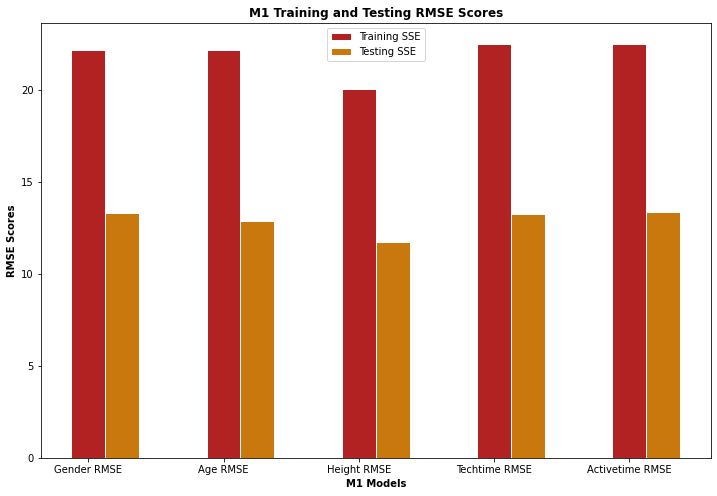

Training RMSE for Model 1 (Gender) is: 22.161116843814444
Test RMSE for Model 1 (Gender) is: 13.292769676041313

Training RMSE for Model 1 (Age) is: 22.17801313725049
Test RMSE for Model 1 (Age) is: 12.875053763798379

Training RMSE for Model 1 (Height) is: 20.03656945876645
Test RMSE for Model 1 (Height) is: 11.713527309358906

Training RMSE for Model 1 (Techtime) is: 22.49711003244986
Test RMSE for Model 1 (Techtime) is: 13.267837380469159

Training RMSE for Model 1 (Activetime) is: 22.488573367068334
Test RMSE for Model 1 (Activetime) is: 13.351547678536035


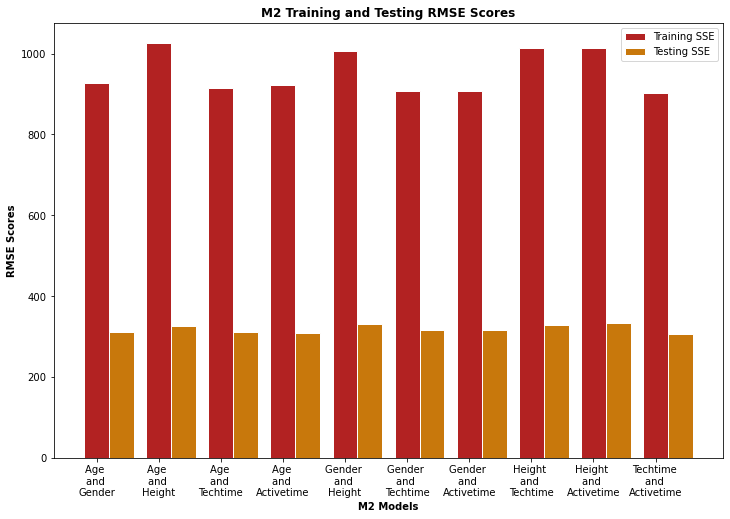

Training RMSE for Model 2 (Age and Gender) is: 928.5176106186933
Test RMSE for Model 2 (Age and Gender) is: 310.81425995323053

Training RMSE for Model 2 (Age and Height) is: 1025.411756655442
Test RMSE for Model 2 (Age and Height) is: 325.3475508140182

Training RMSE for Model 2 (Age and Techtime) is: 916.2376550489237
Test RMSE for Model 2 (Age and Techtime) is: 309.9833944995469

Training RMSE for Model 2 (Age and Activetime) is: 922.0802409884325
Test RMSE for Model 2 (Age and Activetime) is: 307.96089772058014

Training RMSE for Model 2 (Gender and Height) is: 1006.989074453794
Test RMSE for Model 2 (Gender and Height) is: 330.7142926282858

Training RMSE for Model 2 (Gender and Techtime) is: 908.0699768321152
Test RMSE for Model 2 (Gender and Techtime) is: 316.9274420343698

Training RMSE for Model 2 (Gender and Activetime) is: 907.6016647090346
Test RMSE for Model 2 (Gender and Activetime) is: 314.9238377947839

Training RMSE for Model 2 (Height and Techtime) is: 1013.2021768361

In [83]:
# Plotting the RMSE graphs per model.
# Here we set the width of bar.
barWidth = 0.25

Training_bar = [RMSE1_train, RMSE2_train, RMSE3_train, RMSE4_train, RMSE5_train]
Testing_bar = [RMSE1_test, RMSE2_test, RMSE3_test, RMSE4_test, RMSE5_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#B22222', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#C8780C', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M1 Models', fontweight = 'bold')
plt.ylabel('RMSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Gender RMSE', 'Age RMSE', 'Height RMSE', 
                                                   'Techtime RMSE', 'Activetime RMSE'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M1 Training and Testing RMSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training RMSE for Model 1 (Gender) is:', RMSE1_train)
print('Test RMSE for Model 1 (Gender) is:', RMSE1_test)
print('\nTraining RMSE for Model 1 (Age) is:', RMSE2_train)
print('Test RMSE for Model 1 (Age) is:', RMSE2_test)
print('\nTraining RMSE for Model 1 (Height) is:', RMSE3_train)
print('Test RMSE for Model 1 (Height) is:', RMSE3_test)
print('\nTraining RMSE for Model 1 (Techtime) is:', RMSE4_train)
print('Test RMSE for Model 1 (Techtime) is:', RMSE4_test)
print('\nTraining RMSE for Model 1 (Activetime) is:', RMSE5_train)
print('Test RMSE for Model 1 (Activetime) is:', RMSE5_test)


# Here we set the width of bar.
barWidth = 0.4

Training_bar = [RMSE6_train, RMSE7_train, RMSE8_train, RMSE9_train, RMSE10_train, RMSE11_train, RMSE12_train, 
                RMSE13_train, RMSE14_train, RMSE15_train]
Testing_bar = [RMSE6_test, RMSE7_test, RMSE8_test, RMSE9_test, RMSE10_test, RMSE11_test, RMSE12_test, 
               RMSE13_test, RMSE14_test, RMSE15_test]

# Here we set the position of the bars on the x-axis.
r1 = np.arange(len(Training_bar))
r2 = [x + barWidth for x in r1]
 
# Constructing the grouped plot. 
plt.bar(r1, Training_bar, color = '#B22222', width = barWidth, edgecolor = 'white', label = 'Training SSE')
plt.bar(r2, Testing_bar, color = '#C8780C', width = barWidth, edgecolor = 'white', label = 'Testing SSE')


# Add xticks on the middle of the group bars.
plt.xlabel('M2 Models', fontweight = 'bold')
plt.ylabel('RMSE Scores', fontweight = 'bold')
plt.xticks([r for r in range(len(Training_bar))], ['Age \nand \nGender', 'Age \nand \nHeight', 
                                                              'Age \nand \nTechtime', 'Age \nand \nActivetime', 
                                                              'Gender \nand \nHeight','Gender \nand \nTechtime',
                                                              'Gender \nand \nActivetime', 'Height \nand \nTechtime',
                                                              'Height \nand \nActivetime', 'Techtime \nand \nActivetime'])

# Setting the size of the figure. 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# We create the title for the graph
plt.title("M2 Training and Testing RMSE Scores", fontweight = 'bold')

# We create a legend & show the graph.
plt.legend()
plt.show()
print('Training RMSE for Model 2 (Age and Gender) is:', RMSE6_train)
print('Test RMSE for Model 2 (Age and Gender) is:', RMSE6_test)
print('\nTraining RMSE for Model 2 (Age and Height) is:', RMSE7_train)
print('Test RMSE for Model 2 (Age and Height) is:', RMSE7_test)
print('\nTraining RMSE for Model 2 (Age and Techtime) is:', RMSE8_train)
print('Test RMSE for Model 2 (Age and Techtime) is:', RMSE8_test)
print('\nTraining RMSE for Model 2 (Age and Activetime) is:', RMSE9_train)
print('Test RMSE for Model 2 (Age and Activetime) is:', RMSE9_test)
print('\nTraining RMSE for Model 2 (Gender and Height) is:', RMSE10_train)
print('Test RMSE for Model 2 (Gender and Height) is:', RMSE10_test)
print('\nTraining RMSE for Model 2 (Gender and Techtime) is:', RMSE11_train)
print('Test RMSE for Model 2 (Gender and Techtime) is:', RMSE11_test)
print('\nTraining RMSE for Model 2 (Gender and Activetime) is:', RMSE12_train)
print('Test RMSE for Model 2 (Gender and Activetime) is:', RMSE12_test)
print('\nTraining RMSE for Model 2 (Height and Techtime) is:', RMSE13_train)
print('Test RMSE for Model 2 (Height and Techtime) is:', RMSE13_test)
print('\nTraining RMSE for Model 2 (Height and Activetime) is:', RMSE14_train)
print('Test RMSE for Model 2 (Height and Activetime) is:', RMSE14_test)
print('\nTraining RMSE for Model 2 (Techtime and Activetime) is:', RMSE15_train)
print('Test RMSE for Model 2 (Techtime and Activetime) is:', RMSE15_test)


So, now that we have our regression, SSE, and RMSE graphs, its time to choose a model that best fits our data. 

Looking at the graphs, we saw originally that "Time Spent With Technology (TUE)" and "Physical Activity Frequency (FAF)" originally showed little to no effect on increasing or decreasing weight. However, having run our data through secondary multivariate (M2) models, we see that models with Techtime and Activetime are now in fact the best fitting models to our dataset, because they consistantly score lower than other models that don't have them included. 

Thus we can state that the top five models that fit our data the best are:

- **Techtime and Activetime Model:** With a test RMSE score of 305.27
- **Age and Activetime:** With a test RMSE score of 307.96
- **Age and Techtime:** With a test RMSE score of 309.96
- **Age and Gender:** With a test RMSE score of 310.81
- **Gender and Activetime:** With a test RMSE score of 314.92

With all that being said, looking at the testing and training bar graphs for our data, we can see that using Multivariate Linear Regression, we see that Activity Time, Technology Time, and Age are the three biggest attributes from our dataset that effect weight the most! 
